<a href="https://colab.research.google.com/github/pushyag1/NLPClass/blob/master/Cosine_Similarity_with_CBOW_and_Skip_Gram%2CJaccard_similarity_index%2Cwordcloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Use the Europe_Covid.txt file from the DATA 690 Data Files

# Exercise 1. 
Cosine Similarity with CBOW and Skip-Gram

• Load ‘nltk.tokenize’, ‘gensim.models.Word2Vec’

• Clean the text

• Create one model for CBOW and one for Skip-Gram

• Determine the cosine similarity between ‘curfew’ and ‘government’

• Is there any difference in the similarity between ‘curfew’ and
‘government’ when you use CBOW and Skip-Gram?

In [ ]:
!pip install nltk

In [ ]:
!pip install unidecode

     |████████████████████████████████| 245kB 8.3MB/s 


In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize 
import warnings 
  
warnings.filterwarnings(action = 'ignore') 

In [ ]:
import gensim 
from gensim.models import Word2Vec 

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [ ]:
sample = open("Europe_Covid.txt", "r") 
s = sample.read()

In [ ]:
# Replaces escape character with space 
f = s.replace("\n", " ")

In [ ]:
data = [] 
  
# iterate through each sentence in the file 
for i in sent_tokenize(f): 
    temp = [] 
      
    # tokenize the sentence into words 
    for j in word_tokenize(i): 
        temp.append(j.lower()) 
  
    data.append(temp)

In [ ]:
data

In [ ]:
# Create CBOW model 
model1 = gensim.models.Word2Vec(data, min_count = 1,  
                              size = 100, window = 5)

In [ ]:
# Print results 
print("Cosine similarity between 'curfew' " + 
               "and 'government' - CBOW : ", 
    model1.similarity('curfew', 'government')) 


Cosine similarity between 'curfew' and 'government' - CBOW :  -0.061171003


In [ ]:
# Create Skip Gram model 
model2 = gensim.models.Word2Vec(data, min_count = 1, size = 100, 
                                             window = 5, sg = 1) 
  
# Print results 
print("Cosine similarity between 'curfew' " +
          "and 'government' - Skip Gram : ", 
    model2.similarity('curfew', 'government')) 

Cosine similarity between 'curfew' and 'government' - Skip Gram :  -0.013280977


In [ ]:
#Output indicates the cosine similarities between word vectors 'curfew', 'government' for different models. 
#One interesting task might be to change the parameter values of ‘size’ and ‘window’ to observe the variations in the cosine similarities.

In [ ]:
# reference : https://www.geeksforgeeks.org/python-word-embedding-using-word2vec/

## Exercise 2. Compute the Jaccard similarity index

• Load ‘word_tokenize’ and ‘WordNetLemmatizer’ from nltk, among
other libraries

• Use these pairs for comparison:

o pair1 = ["What you do defines you","Your deeds define you"]

o pair2 = ["Once upon a time there lived a king.", "Who is your
queen?"]

o pair3 = ["He is desperate", "Is he not desperate?"]

• What is the Jaccard similarity index between pair1[0] and pair1[1]?

In [ ]:
import nltk

sent1 = "What you do defines you"
sent2 = "Your deeds define you"
sent3 = "Once upon a time there lived a king."
sent4 = "Who is your queen?" 
sent5 = "He is desperate"
sent6 = "Is he not desperate?"


In [ ]:

ed_sent_1_2 = nltk.edit_distance(sent1, sent2)
ed_sent_3_4 = nltk.edit_distance(sent3, sent4)
ed_sent_5_6 = nltk.edit_distance(sent5, sent6)


In [ ]:

print(ed_sent_1_2, 'Edit Distance between sent1 and sent2')
print(ed_sent_3_4, 'Edit Distance between sent3 and sent4')
print(ed_sent_5_6, 'Edit Distance between sent5 and sent6')



10 Edit Distance between sent1 and sent2
28 Edit Distance between sent3 and sent4
8 Edit Distance between sent5 and sent6


In [ ]:
sent1 = set("What you do defines you")
sent2 = set("Your deeds define you")
sent3 = set("Once upon a time there lived a king.")
sent4 = set("Who is your queen?")
sent5 = set("He is desperate")
sent6 = set("Is he not desperate?")

In [ ]:
jd_sent_1_2 = nltk.jaccard_distance(sent1, sent2)
jd_sent_3_4 = nltk.jaccard_distance(sent3, sent4)
jd_sent_5_6 = nltk.jaccard_distance(sent5, sent6)

In [ ]:
print(jd_sent_1_2, 'Jaccard Distance between sent1 and sent2')
print(jd_sent_3_4, 'Jaccard Distance between sent3 and sent4')
print(jd_sent_5_6, 'Jaccard Distance between sent5 and sent6')

0.375 Jaccard Distance between sent1 and sent2
0.68 Jaccard Distance between sent3 and sent4
0.4666666666666667 Jaccard Distance between sent5 and sent6


In [ ]:
#reference : https://python.gotrained.com/nltk-edit-distance-jaccard-distance/

## Exercise 3. What is the sentiment and subjectivity of the Europe_Covid text?
• Use ‘SentimentIntensityAnalyser’ from nltk.sentiment.vader to provide
the positive, neutral, negative, and compound sentiment.

• What is the subjectivity?

In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
sid.polarity_scores(s)

{'compound': 0.4691, 'neg': 0.039, 'neu': 0.911, 'pos': 0.05}

In [ ]:
#reference : https://towardsdatascience.com/sentimental-analysis-using-vader-a3415fef7664

##Exercise 4. WordCloud

• What are the most frequently used words in the Europe_Covid text?

In [ ]:
!pip install wordcloud

In [ ]:
import collections
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib import rcParams
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

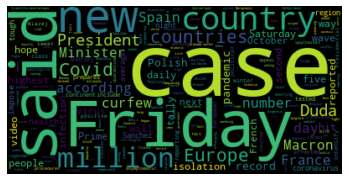

In [ ]:
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(s)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

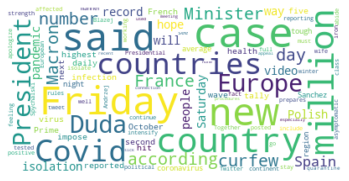

In [ ]:
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(s)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
#reference : https://www.datacamp.com/community/tutorials/wordcloud-python


## Exercise 5. 
Summarize the text in 250 words using extractive
summarization (‘from genism.summarization import summarize’)

In [ ]:
from pprint import pprint as print
from gensim.summarization import summarize

In [ ]:
print(summarize(s))

('European countries are reporting record numbers of Covid-19 cases as the '
 'continent prepares for the pandemic to intensify through winter.Those '
 "affected include Europe's political class.\n"
 'Polish President Andrzej Duda tested positive for Covid-19 on Friday, '
 'according to a tweet from Presidential Minister Blazej Spychalski Saturday.\n'
 "Duda's diagnosis comes as the country reported 13,632 new cases Friday, the "
 'highest daily tally since the pandemic began.\n'
 'On the same day France reported 42,032 new cases in 24 hours, a new record, '
 'according to the French Health Agency.')


In [ ]:
print(summarize(s, word_count=250))

('European countries are reporting record numbers of Covid-19 cases as the '
 'continent prepares for the pandemic to intensify through winter.Those '
 "affected include Europe's political class.\n"
 'Polish President Andrzej Duda tested positive for Covid-19 on Friday, '
 'according to a tweet from Presidential Minister Blazej Spychalski Saturday.\n'
 "Duda's diagnosis comes as the country reported 13,632 new cases Friday, the "
 'highest daily tally since the pandemic began.\n'
 '"The second wave has hit the entire Europe equally," Prime Minister Mateusz '
 'Morawiecki said Friday.\n'
 'The five countries with the highest rate of infection worldwide are all in '
 "Europe, according to Johns Hopkins University's latest moving averages, as "
 'analyzed by CNN.The worst-hit nations are the Czech Republic, Belgium, the '
 'Netherlands, Switzerland and France.In all five countries, the number of new '
 'infections has surged since the beginning of October.\n'
 'French President Emmanuel M

In [ ]:
#reference : https://radimrehurek.com/gensim/auto_examples/tutorials/run_summarization.html